In [51]:
# Imports, nothing to see here
import random
import sys,os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sys.path.insert(0, os.path.abspath('..'))
from spreadsheet.cell import Cell
from spreadsheet.arraySpreadsheet import ArraySpreadsheet
from spreadsheet.linkedlistSpreadsheet import LinkedListSpreadsheet
from spreadsheet.csrSpreadsheet import CSRSpreadsheet
from spreadsheet.baseSpreadsheet import BaseSpreadsheet
from time import perf_counter

In [52]:
def create_random_cells(num_cells: int, max_col:int, max_row:int) -> list[Cell]:
    ret = ""
    ret += str(max_row-1)+" "+ str(max_col-1)+ " "+str(round(random.uniform(0.1,9.9), ndigits=2)) +"\n"
    for _ in range(num_cells):
        row = random.randint(0, max_col-1)
        col = random.randint(0, max_row-1)
        val = round(random.uniform(0.1,9.9), ndigits=2)
        ret += str(row) +" "+  str(col) + " "+str(val)+"\n"
    return ret

def write_to_file(cells_to_generate:int, max_col:int, max_row:int):
    file = open("sample_data.txt","w")
    file.write(create_random_cells(cells_to_generate, max_col, max_row))

def display_array(array: ArraySpreadsheet):
    arr =array.array 
    for x in arr:
        for y in x:
            if(y.val == None):
                print("("+str(y.row),str(y.col)+" N)", end = " ")
            else:
                print(y, end = " ")
        print() #newline
    print("finished")

def get_lCells()->list[Cell]:
    """
    basically read from the file and create a list of cells from the data from the file
    """
    try:
        lcells = []
        data_time = perf_counter()
        dataFile = open("sample_data.txt", 'r')
        for line in dataFile:
            values = line.split()
            currRow = int(values[0])
            currCol = int(values[1])
            currVal = float(values[2])
            currCell = Cell(currRow, currCol, currVal)
            # each line contains a cell
            lcells.append(currCell)
        dataFile.close()
        data_time_close = perf_counter()
        return lcells
    except FileNotFoundError as e:
        print("Data file doesn't exist.")
    pass

def set_up_cells(cells_to_generate, max_col, max_row):
    write_to_file(cells_to_generate, max_col, max_row)
    return get_lCells()

def test_buildSpreadSheet(spreadSheet:BaseSpreadsheet,lCells:list[Cell]):
    start_time = perf_counter()
    spreadSheet.buildSpreadsheet(lCells)
    end_time = perf_counter()
    return end_time-start_time

def test_entries(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.entries()
    end_time = perf_counter()
    return end_time-start_time

def test_update(spreadSheet:BaseSpreadsheet, rowIndex: int, colIndex:int, val:float):
    start_time = perf_counter()
    spreadSheet.update(rowIndex, colIndex,val)
    end_time = perf_counter()
    return end_time-start_time

def test_append_row(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.appendRow()
    end_time = perf_counter()
    return end_time-start_time

def test_append_col(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.appendCol()
    end_time = perf_counter()
    return end_time-start_time

def test_insert_row(spreadSheet:BaseSpreadsheet, rowIndex:int):
    start_time = perf_counter()
    spreadSheet.insertRow(rowIndex)
    end_time = perf_counter()
    return end_time-start_time

def test_insert_col(spreadsheet:BaseSpreadsheet, colIndex:int):
    start_time = perf_counter()
    spreadsheet.insertCol(colIndex)
    end_time = perf_counter()
    return end_time-start_time

def find(spreadSheet:BaseSpreadsheet, value:float):
    start_time = perf_counter()
    spreadSheet.find(value)
    end_time = perf_counter()
    return end_time-start_time


In [53]:
small_spreadsheets= []
for _ in range(10):
    small_spreadsheets.append(ArraySpreadsheet())
small_lCells = []
for _ in range(10):
    small_lCells.append(set_up_cells(_*500, 25, 25))

small_spreadsheet_tests = []
small_spreadsheet_tests.append([test_buildSpreadSheet(small_spreadsheets[x], small_lCells[x])*1000 for x in range(10)])
small_spreadsheet_tests.append([test_append_col(small_spreadsheets[x])*1000 for x in range(10)])
small_spreadsheet_tests.append([test_append_row(small_spreadsheets[x])*1000 for x in range(10)])
small_spreadsheet_tests.append([test_insert_col(small_spreadsheets[x], x)*1000 for x in range(10)])
small_spreadsheet_tests.append([test_insert_row(small_spreadsheets[x], x)*1000 for x in range(10)])
small_spreadsheet_tests.append([test_entries(small_spreadsheets[x])*1000 for x in range(10)])

df_small = pd.DataFrame(small_spreadsheet_tests)
df_small.columns = [500*x for x in range(1,11)]
df_small.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries"]  
df_small

,500,1000,1500,2000,2500,3000,3500,4000,4500,5000
build_spreadsheet,0.396000,0.468375,0.698208,0.937125,1.207833,1.486917,1.788041,1.948000,2.420459,2.432208
append_col,0.008250,0.006834,0.007042,0.011750,0.006666,0.006666,0.006750,0.007292,0.006041,0.006000
append_row,0.008625,0.007542,0.011834,0.007500,0.007416,0.008750,0.007541,0.007584,0.008583,0.007459
insert_col,0.074208,0.066958,0.062541,0.071417,0.057000,0.059916,0.057000,0.051166,0.049250,0.045709
insert_row,0.044875,0.043208,0.041834,0.040084,0.042542,0.037500,0.038791,0.043417,0.037333,0.031417
entries,0.045000,0.612583,0.945375,1.021291,1.086958,1.131792,1.137250,1.171208,1.185000,1.158042


In [54]:
med_spreadsheets= []
for _ in range(10):
    med_spreadsheets.append(ArraySpreadsheet())
med_lCells = []
for _ in range(10):
    med_lCells.append(set_up_cells(_*5_000, 25, 25))

med_spreadsheet_tests = []
med_spreadsheet_tests.append([test_buildSpreadSheet(med_spreadsheets[x], med_lCells[x])*1000 for x in range(10)])
med_spreadsheet_tests.append([test_append_col(med_spreadsheets[x])*1000 for x in range(10)])
med_spreadsheet_tests.append([test_append_row(med_spreadsheets[x])*1000 for x in range(10)])
med_spreadsheet_tests.append([test_insert_col(med_spreadsheets[x], x)*1000 for x in range(10)])
med_spreadsheet_tests.append([test_insert_row(med_spreadsheets[x], x)*1000 for x in range(10)])
med_spreadsheet_tests.append([test_entries(med_spreadsheets[x])*1000 for x in range(10)])

df_med = pd.DataFrame(med_spreadsheet_tests)
df_med.columns = [5000*x for x in range(1,11)]
df_med.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries"]  
df_med

,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000
build_spreadsheet,0.170167,2.599333,5.170125,7.395333,9.987375,12.582291,15.270833,17.972375,19.960208,22.494166
append_col,0.009625,0.008625,0.008542,0.008083,0.007917,0.012583,0.008208,0.008041,0.008667,0.005792
append_row,0.008708,0.007375,0.022708,0.035333,0.007208,0.007292,0.010958,0.007292,0.007250,0.008708
insert_col,0.075167,0.079000,0.071292,0.068375,0.068125,0.066917,0.069417,0.059083,0.054375,0.044375
insert_row,0.044208,0.042625,0.041375,0.039208,0.040583,0.037667,0.035541,0.034125,0.031750,0.032209
entries,0.044125,1.124875,1.155542,1.166500,1.133875,1.112333,1.142417,1.141584,1.122084,1.134667


In [55]:
large_spreadsheets= []
for _ in range(10):
    large_spreadsheets.append(ArraySpreadsheet())
large_lCells = []
for _ in range(10):
    large_lCells.append(set_up_cells(_*50_000, 25, 25))

large_spreadsheet_tests = []
large_spreadsheet_tests.append([test_buildSpreadSheet(large_spreadsheets[x], med_lCells[x])*1000 for x in range(10)])
large_spreadsheet_tests.append([test_append_col(large_spreadsheets[x])*1000 for x in range(10)])
large_spreadsheet_tests.append([test_append_row(large_spreadsheets[x])*1000 for x in range(10)])
large_spreadsheet_tests.append([test_insert_col(large_spreadsheets[x], x)*1000 for x in range(10)])
large_spreadsheet_tests.append([test_insert_row(large_spreadsheets[x], x)*1000 for x in range(10)])
large_spreadsheet_tests.append([test_entries(large_spreadsheets[x])*1000 for x in range(10)])

df_large = pd.DataFrame(med_spreadsheet_tests)
df_large.columns = [50_000*x for x in range(1,11)]
df_large.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries"]  
df_large

,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000
build_spreadsheet,0.170167,2.599333,5.170125,7.395333,9.987375,12.582291,15.270833,17.972375,19.960208,22.494166
append_col,0.009625,0.008625,0.008542,0.008083,0.007917,0.012583,0.008208,0.008041,0.008667,0.005792
append_row,0.008708,0.007375,0.022708,0.035333,0.007208,0.007292,0.010958,0.007292,0.007250,0.008708
insert_col,0.075167,0.079000,0.071292,0.068375,0.068125,0.066917,0.069417,0.059083,0.054375,0.044375
insert_row,0.044208,0.042625,0.041375,0.039208,0.040583,0.037667,0.035541,0.034125,0.031750,0.032209
entries,0.044125,1.124875,1.155542,1.166500,1.133875,1.112333,1.142417,1.141584,1.122084,1.134667


In [69]:
# plt.figure()
df_large["mean"] = df_large.mean(axis=1)
df_med["mean"] = df_small.mean(axis=1)
df_small["mean"] = df_small.mean(axis=1)
df_large

,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,mean
build_spreadsheet,0.170167,2.599333,5.170125,7.395333,9.987375,12.582291,15.270833,17.972375,19.960208,22.494166,11.360221
append_col,0.009625,0.008625,0.008542,0.008083,0.007917,0.012583,0.008208,0.008041,0.008667,0.005792,0.008608
append_row,0.008708,0.007375,0.022708,0.035333,0.007208,0.007292,0.010958,0.007292,0.007250,0.008708,0.012283
insert_col,0.075167,0.079000,0.071292,0.068375,0.068125,0.066917,0.069417,0.059083,0.054375,0.044375,0.065613
insert_row,0.044208,0.042625,0.041375,0.039208,0.040583,0.037667,0.035541,0.034125,0.031750,0.032209,0.037929
entries,0.044125,1.124875,1.155542,1.166500,1.133875,1.112333,1.142417,1.141584,1.122084,1.134667,1.027800


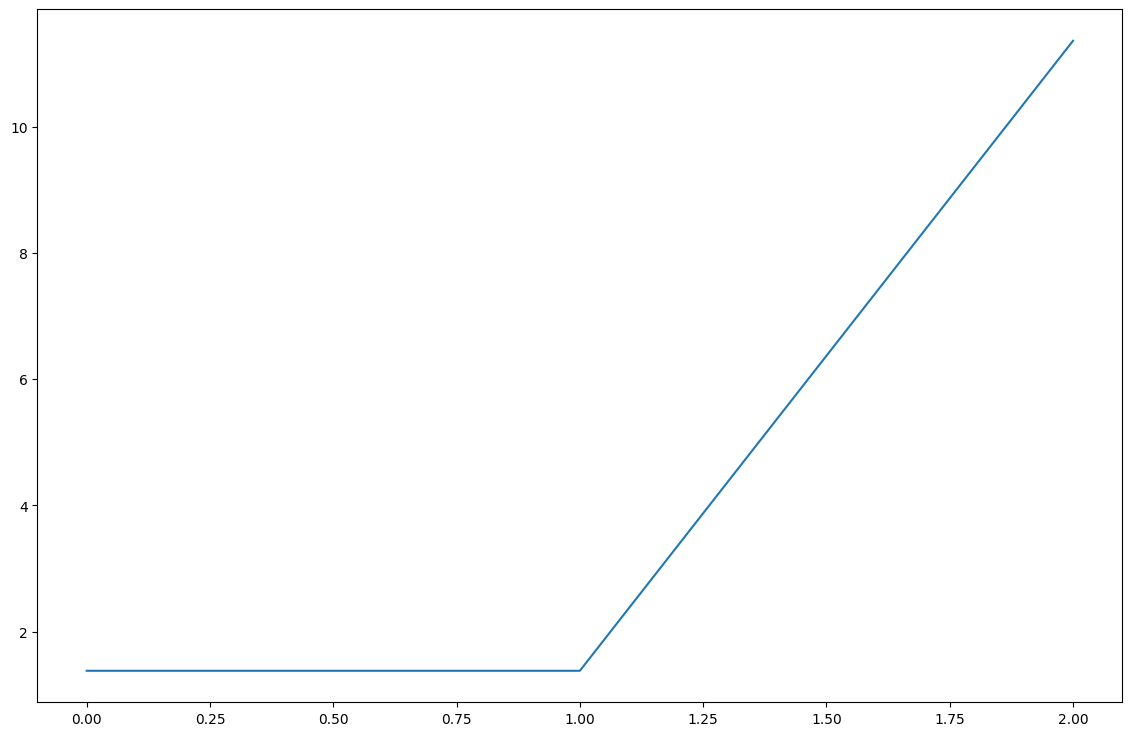

In [76]:
fig = plt.figure(figsize=(14,9))
li = [df_small.iloc[0].loc["mean"], df_med.iloc[0].loc["mean"], df_large.iloc[0].loc["mean"]]
plt.plot(li)